# 1. Analysis of Soundfiles


In [37]:
from comet_ml import Experiment
from pathlib import Path
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from src.utils import load_data, extract_features
%matplotlib inline

In [2]:
# setup management via comet.ml
experiment = Experiment(api_key="k4DgVz1cmTM6MS4shK1A1K0aQ", project_name="urbansound", workspace="slashme")

COMET INFO: old comet version (3.0.1) detected. current: 3.0.2 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/slashme/urbansound/a710b468a04c4e6392630e6d9703799e



In [38]:
FIG_DIR = Path('./reports/figures/')

### 1.1 Load data from filesystem

In [3]:
data_dir = Path('./data/raw')
data_long = load_data(data_dir, "train_long.csv", "train_long_cached.pkl")
data_short = load_data(data_dir, "train_short.csv", "train_short_cached.pkl")

100%|██████████| 136/136 [00:15<00:00,  8.84it/s]


In [4]:
data_long

,ID,Class,raw,sample_rate,duration
0,0,siren,"[-0.012129276, -0.027601117, -0.025355084, -0....",22050,4.000000
1,1,street_music,"[-0.09602016, -0.14303702, 0.05203498, 0.10233...",22050,4.000000
2,2,drilling,"[-0.0006929353, -0.0012265302, -0.0011871828, ...",22050,4.000000
3,3,siren,"[0.02706518, 0.048945263, -0.052624583, -0.208...",22050,4.000000
4,4,dog_bark,"[0.07636129, 0.117822915, 0.10266275, 0.106471...",22050,4.000000
...,...,...,...,...,...
3632,8720,street_music,"[-0.07785502, -0.11421067, -0.10142167, -0.110...",22050,4.000000
3633,8722,dog_bark,"[0.0019674515, 0.003834403, 0.0017573227, 0.00...",22050,3.480000
3634,8723,street_music,"[-0.13602088, -0.19903006, -0.17202714, -0.187...",22050,4.000000
3635,8726,dog_bark,"[-9.743463e-05, -0.00013001809, -7.625971e-05,...",22050,2.206485


In [65]:
len(data_long)

3637

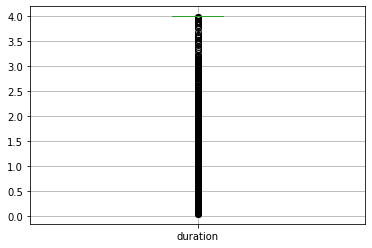

In [33]:
data_long.boxplot(column=['duration'])

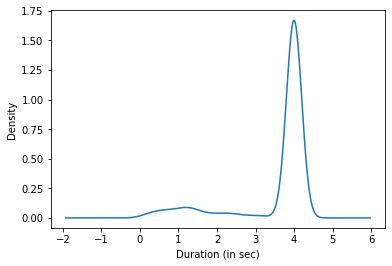

In [41]:
ax = data_long.duration.plot.kde()
ax.set_xlabel("Duration (in sec)")
ax.get_figure().savefig(FIG_DIR/'duration_kde.png')

In [69]:
data_long[ data_long.duration == min(data_long.duration)]

,ID,Class,raw,sample_rate,duration,features,n_mfccs,n_frames,n_samples
133,300,car_horn,"[-0.1706544, -0.24740018, -0.18523908, -0.2070...",22050,0.050023,"[[-47.86329, -35.79061, -34.164536], [104.7078...",40,3,1103
1569,3806,car_horn,"[0.013584971, 0.029411027, -0.014071245, -0.04...",22050,0.050023,"[[-18.428469, -18.6973, -30.812351], [113.3903...",40,3,1103


### 1.2 Extracting and analysing features

For every sample the `mel-frequency cepstrum coefficients` are being extracted. Furthermore, the number of extracted features and frames are being review which will be relevant for the construction of the model architecture.

In [5]:
# def extract_features(raw, sample_rate, max_pad=0, pad_mode='constant'):
#     mfcc = librosa.feature.mfcc(y=raw, sr=sample_rate, n_mfcc=40)
#     if max_pad > 0:
#         pad_width = max_pad - mfcc.shape[1]
#         mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode=pad_mode)
#     return pd.Series({'features': mfcc, 'n_mfccs': mfcc.shape[0], 'n_frames': mfcc.shape[1], 'n_samples': len(raw)})

In [6]:
data_long[['features', 'n_mfccs', 'n_frames', 'n_samples']] = data_long.apply(
    lambda x: extract_features(x.raw, x.sample_rate), axis=1)

In [7]:
#data_long.assign(extract_features(data_long.raw, data_long.sample_rate), axis=1)

In [8]:
data_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 0 to 3636
Data columns (total 9 columns):
ID             3637 non-null object
Class          3637 non-null object
raw            3637 non-null object
sample_rate    3637 non-null int64
duration       3637 non-null float64
features       3637 non-null object
n_mfccs        3637 non-null int64
n_frames       3637 non-null int64
n_samples      3637 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 284.1+ KB


##### 1.2.1 Number of MFCCs

In [9]:
data_long.n_mfccs.describe()

count    3637.0
mean       40.0
std         0.0
min        40.0
25%        40.0
50%        40.0
75%        40.0
max        40.0
Name: n_mfccs, dtype: float64

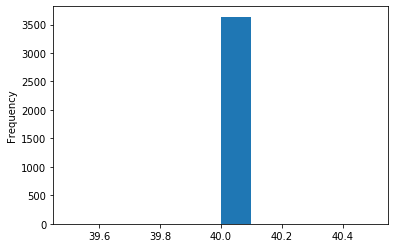

In [10]:
data_long.n_mfccs.plot.hist()

#### 1.2.2 Number of extracted frames per sample

In [11]:
data_long.n_frames.describe()

count    3637.000000
mean      154.292274
std        44.182167
min         3.000000
25%       173.000000
50%       173.000000
75%       173.000000
max       173.000000
Name: n_frames, dtype: float64

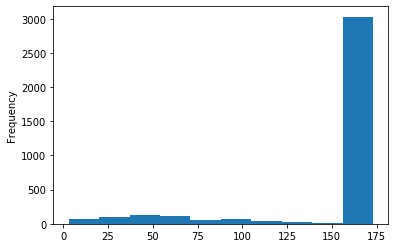

In [12]:
data_long.n_frames.plot.hist()

#### 1.2.3 Number of samples per file

In [13]:
 data_long.n_samples.describe()

count     3637.000000
mean     78643.465768
std      22576.709250
min       1103.000000
25%      88200.000000
50%      88200.000000
75%      88200.000000
max      88200.000000
Name: n_samples, dtype: float64

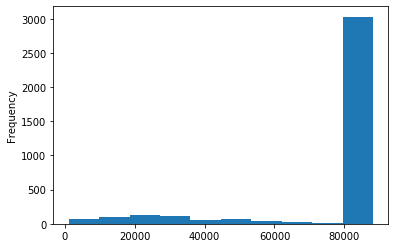

In [14]:
data_long.n_samples.plot.hist()

#### 1.2.4 Relationship between number of frames and samples

The number of extracted frames and number of samples per file appear to have the same distribution. 
As both depend on the length of the audio file this comes as no surprise. To confirm the assumed relationship between them they are plotted against each other.

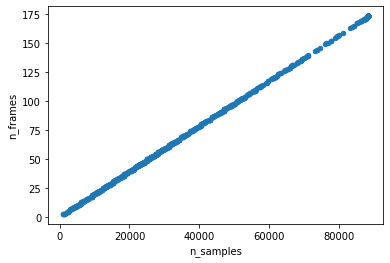

In [15]:
data_long.plot.scatter(x='n_samples', y='n_frames')

As the scatter plot clearly shows are the number of extracted frames and number of samples per file (as expected) directly related.  
Some architectures expect a fixed input size. That's why the number of frames will be padded to **174** for every audio file.

## 1.3 Inspect variation of provided audios samples

Next, the variation in the provided dataset is analyzed.

In [16]:
data_long.Class.value_counts()

siren               488
drilling            468
dog_bark            433
street_music        399
jackhammer          377
children_playing    375
air_conditioner     351
engine_idling       346
car_horn            249
gun_shot            151
Name: Class, dtype: int64

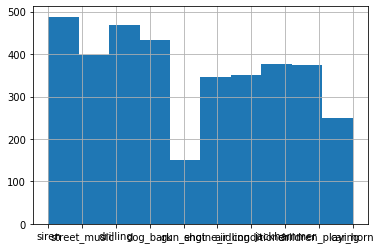

In [17]:
data_long.Class.hist()

In [18]:
data_short.Class.value_counts()

drilling            20
jackhammer          20
siren               17
dog_bark            17
street_music        16
children_playing    14
air_conditioner     10
engine_idling        8
car_horn             7
gun_shot             6
dog_bar              1
Name: Class, dtype: int64

The training data contains

In [62]:
def show_waveplots_per_sample(df):
    fig = plt.figure(figsize=(15,15))# Log graphic of waveforms to Comet
    fig_cols = 2
    fig_rows = math.ceil(len(df)/fig_cols)
    print(f"Facet: {fig_rows}x{fig_cols}")
    #experiment.log_image('class_examples.png')
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i, sample in df.reset_index().iterrows():  # reset index to get proper i necessary for subplot
        fig.add_subplot(fig_rows, fig_cols, i+1)
        plt.title(sample.Class)
        librosa.display.waveplot(sample.raw, sr=sample.sample_rate)
        #experiment.log_audio(sample.raw, sample.sample_rate, metadata = {'name': sample.Class})
    plt.savefig(FIG_DIR/'mfccs_class_samples.png', transparent=True)

In [60]:
def show_spectrum_per_sample(df, tag=''):
    fig = plt.figure(figsize=(15,15))# Log graphic of waveforms to Comet
    fig_cols = 2
    fig_rows = math.ceil(len(df)/fig_cols)
    print(f"Facet: {fig_rows}x{fig_cols}")
    #experiment.log_image('class_examples.png')
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i, sample in df.reset_index().iterrows():  # reset index to get proper i necessary for subplot
        fig.add_subplot(fig_rows, fig_cols, i+1)
        plt.title(sample.Class)
        librosa.display.specshow(sample.features, sr=sample.sample_rate, x_axis='time', y_axis='mel')
        #experiment.log_audio(sample.raw, sample.sample_rate, metadata = {'name': sample.Class})
    plt.savefig(FIG_DIR/f'mfccs_class_samples_spectrum{tag}.png', transparent=True)

#### Waveplot per class

Facet: 5x2


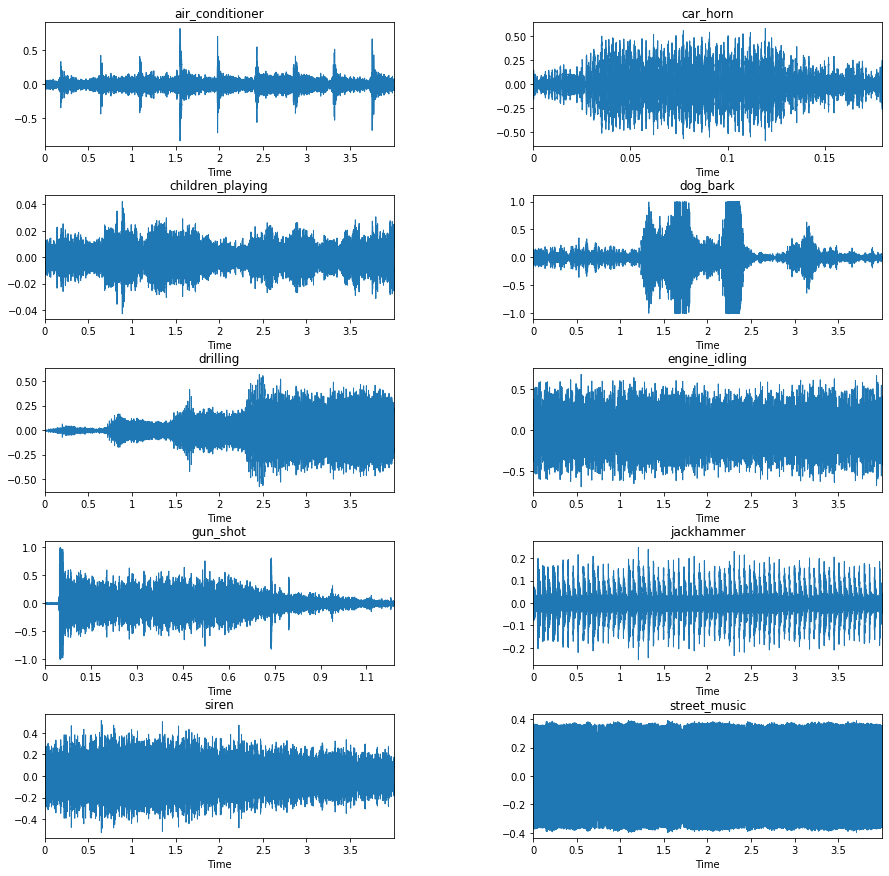

In [63]:
unique_df = data_long.groupby('Class').first().reset_index()
show_waveplots_per_sample(unique_df)

Facet: 5x2


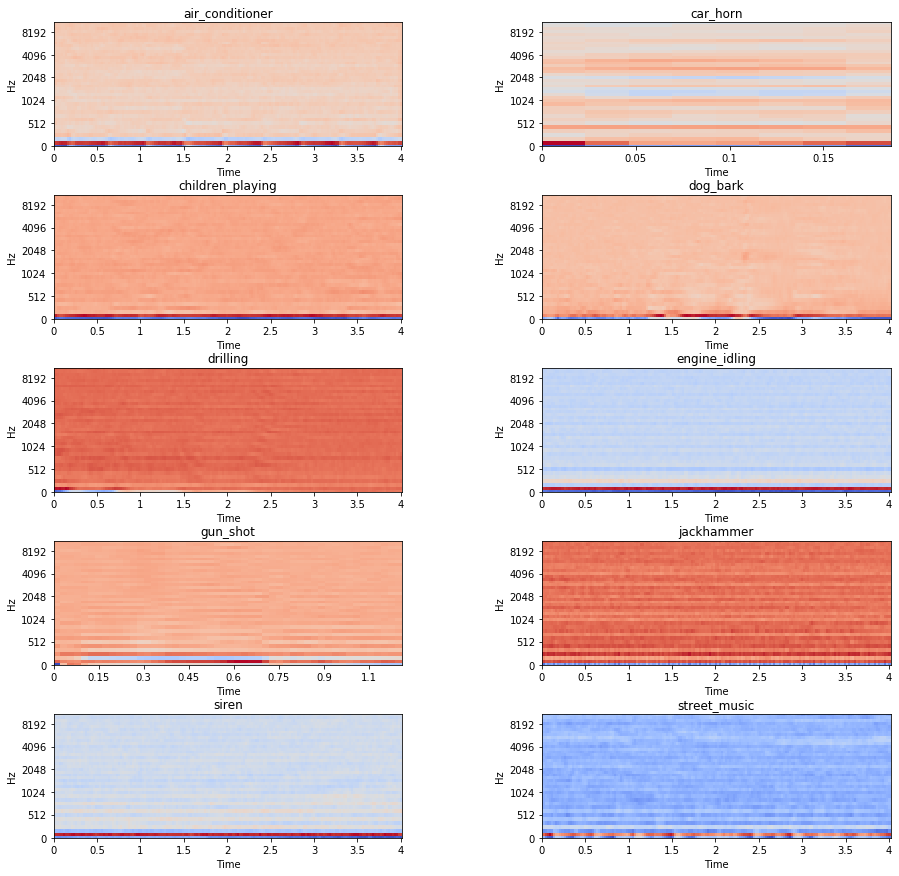

In [64]:
show_spectrum_per_sample(unique_df)

#### Show spectogram for short audio files

In [23]:
short_samples = data_long[data_long.n_frames < 70].sample(10)
short_samples[['feature', 'n_mfccs', 'n_frames', 'n_samples']] = short_samples.apply(lambda x: extract_features(x.raw, x.sample_rate, max_pad=174), axis=1)

In [24]:
short_samples

,ID,Class,raw,sample_rate,duration,features,n_mfccs,n_frames,n_samples,feature
3059,7382,dog_bark,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,1.008571,"[[-305.94794, -239.11188, -192.73589, -164.733...",40,174,22239,"[[-305.94794, -239.11188, -192.73589, -164.733..."
1496,3626,gun_shot,"[-0.015372166, -0.022677945, -0.021351825, -0....",22050,0.610023,"[[-408.90198, -110.19541, 5.7189198, -2.518666...",40,174,13451,"[[-408.90198, -110.19541, 5.7189198, -2.518666..."
870,2105,dog_bark,"[0.02132669, 0.031415798, 0.028103217, 0.03091...",22050,1.199864,"[[-415.53217, -413.58997, -402.59796, -391.431...",40,174,26457,"[[-415.53217, -413.58997, -402.59796, -391.431..."
2529,6163,car_horn,"[-0.002956631, -0.006713257, 0.0065276134, 0.0...",22050,0.215646,"[[-88.65453, -79.61225, -63.759514, -53.721954...",40,174,4755,"[[-88.65453, -79.61225, -63.759514, -53.721954..."
3386,8151,car_horn,"[-0.0007325389, -0.0010368609, -0.0009330655, ...",22050,1.037778,"[[-204.52446, -101.37537, -62.811626, -57.7081...",40,174,22883,"[[-204.52446, -101.37537, -62.811626, -57.7081..."
1555,3764,children_playing,"[0.0012932771, 0.001868815, 0.0014290549, 0.00...",22050,1.330023,"[[-571.936, -480.93973, -329.86884, -215.86115...",40,174,29327,"[[-571.936, -480.93973, -329.86884, -215.86115..."
3570,8590,car_horn,"[-0.005487906, -0.008529093, -0.0077621234, -0...",22050,0.266032,"[[-443.1955, -401.42093, -374.44394, -370.3817...",40,174,5866,"[[-443.1955, -401.42093, -374.44394, -370.3817..."
1314,3196,gun_shot,"[-0.00033200256, -0.00055840774, -0.0005378242...",22050,0.478458,"[[-171.16087, -12.467489, 10.874138, -63.07778...",40,174,10550,"[[-171.16087, -12.467489, 10.874138, -63.07778..."
1994,4847,car_horn,"[-0.009549858, -0.011535291, -0.004293591, -0....",22050,1.340000,"[[-252.5273, -212.4686, -191.37013, -186.52382...",40,174,29547,"[[-252.5273, -212.4686, -191.37013, -186.52382..."
1224,3001,dog_bark,"[-0.0023482319, -0.0011147838, 0.0009166423, 0...",22050,0.488662,"[[-327.07474, -320.36475, -334.02576, -346.240...",40,174,10775,"[[-327.07474, -320.36475, -334.02576, -346.240..."


In [25]:
short_samples

,ID,Class,raw,sample_rate,duration,features,n_mfccs,n_frames,n_samples,feature
3059,7382,dog_bark,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,1.008571,"[[-305.94794, -239.11188, -192.73589, -164.733...",40,174,22239,"[[-305.94794, -239.11188, -192.73589, -164.733..."
1496,3626,gun_shot,"[-0.015372166, -0.022677945, -0.021351825, -0....",22050,0.610023,"[[-408.90198, -110.19541, 5.7189198, -2.518666...",40,174,13451,"[[-408.90198, -110.19541, 5.7189198, -2.518666..."
870,2105,dog_bark,"[0.02132669, 0.031415798, 0.028103217, 0.03091...",22050,1.199864,"[[-415.53217, -413.58997, -402.59796, -391.431...",40,174,26457,"[[-415.53217, -413.58997, -402.59796, -391.431..."
2529,6163,car_horn,"[-0.002956631, -0.006713257, 0.0065276134, 0.0...",22050,0.215646,"[[-88.65453, -79.61225, -63.759514, -53.721954...",40,174,4755,"[[-88.65453, -79.61225, -63.759514, -53.721954..."
3386,8151,car_horn,"[-0.0007325389, -0.0010368609, -0.0009330655, ...",22050,1.037778,"[[-204.52446, -101.37537, -62.811626, -57.7081...",40,174,22883,"[[-204.52446, -101.37537, -62.811626, -57.7081..."
1555,3764,children_playing,"[0.0012932771, 0.001868815, 0.0014290549, 0.00...",22050,1.330023,"[[-571.936, -480.93973, -329.86884, -215.86115...",40,174,29327,"[[-571.936, -480.93973, -329.86884, -215.86115..."
3570,8590,car_horn,"[-0.005487906, -0.008529093, -0.0077621234, -0...",22050,0.266032,"[[-443.1955, -401.42093, -374.44394, -370.3817...",40,174,5866,"[[-443.1955, -401.42093, -374.44394, -370.3817..."
1314,3196,gun_shot,"[-0.00033200256, -0.00055840774, -0.0005378242...",22050,0.478458,"[[-171.16087, -12.467489, 10.874138, -63.07778...",40,174,10550,"[[-171.16087, -12.467489, 10.874138, -63.07778..."
1994,4847,car_horn,"[-0.009549858, -0.011535291, -0.004293591, -0....",22050,1.340000,"[[-252.5273, -212.4686, -191.37013, -186.52382...",40,174,29547,"[[-252.5273, -212.4686, -191.37013, -186.52382..."
1224,3001,dog_bark,"[-0.0023482319, -0.0011147838, 0.0009166423, 0...",22050,0.488662,"[[-327.07474, -320.36475, -334.02576, -346.240...",40,174,10775,"[[-327.07474, -320.36475, -334.02576, -346.240..."


Facet: 5x2


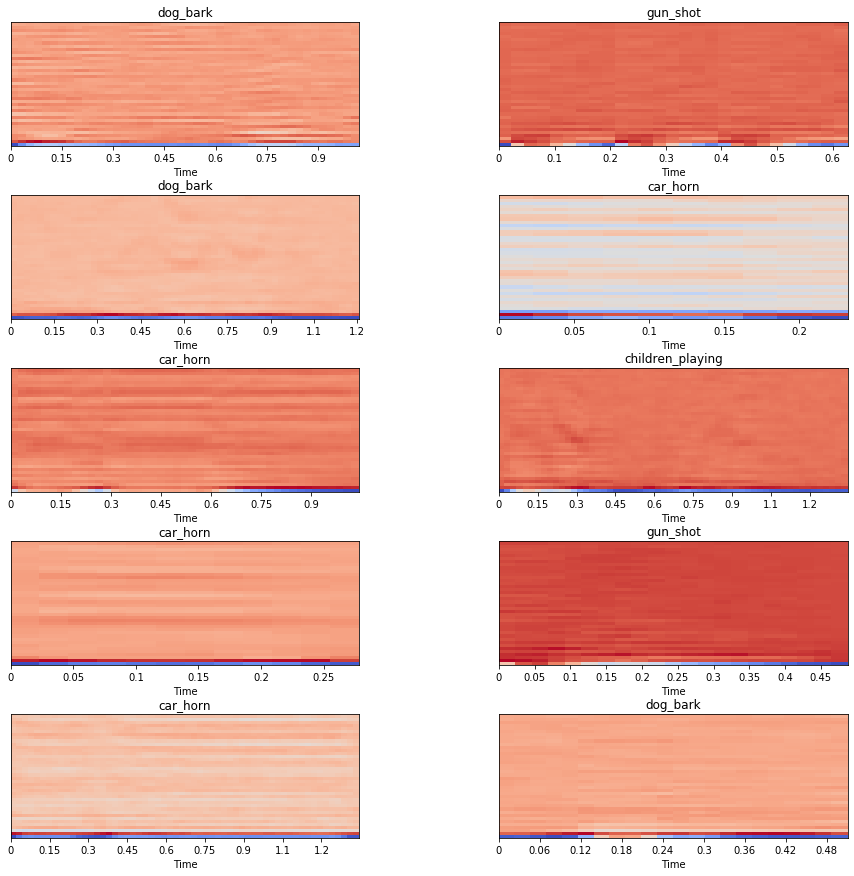

In [26]:
show_spectrum_per_sample(short_samples)

In [27]:
short_samples

,ID,Class,raw,sample_rate,duration,features,n_mfccs,n_frames,n_samples,feature
3059,7382,dog_bark,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,1.008571,"[[-305.94794, -239.11188, -192.73589, -164.733...",40,174,22239,"[[-305.94794, -239.11188, -192.73589, -164.733..."
1496,3626,gun_shot,"[-0.015372166, -0.022677945, -0.021351825, -0....",22050,0.610023,"[[-408.90198, -110.19541, 5.7189198, -2.518666...",40,174,13451,"[[-408.90198, -110.19541, 5.7189198, -2.518666..."
870,2105,dog_bark,"[0.02132669, 0.031415798, 0.028103217, 0.03091...",22050,1.199864,"[[-415.53217, -413.58997, -402.59796, -391.431...",40,174,26457,"[[-415.53217, -413.58997, -402.59796, -391.431..."
2529,6163,car_horn,"[-0.002956631, -0.006713257, 0.0065276134, 0.0...",22050,0.215646,"[[-88.65453, -79.61225, -63.759514, -53.721954...",40,174,4755,"[[-88.65453, -79.61225, -63.759514, -53.721954..."
3386,8151,car_horn,"[-0.0007325389, -0.0010368609, -0.0009330655, ...",22050,1.037778,"[[-204.52446, -101.37537, -62.811626, -57.7081...",40,174,22883,"[[-204.52446, -101.37537, -62.811626, -57.7081..."
1555,3764,children_playing,"[0.0012932771, 0.001868815, 0.0014290549, 0.00...",22050,1.330023,"[[-571.936, -480.93973, -329.86884, -215.86115...",40,174,29327,"[[-571.936, -480.93973, -329.86884, -215.86115..."
3570,8590,car_horn,"[-0.005487906, -0.008529093, -0.0077621234, -0...",22050,0.266032,"[[-443.1955, -401.42093, -374.44394, -370.3817...",40,174,5866,"[[-443.1955, -401.42093, -374.44394, -370.3817..."
1314,3196,gun_shot,"[-0.00033200256, -0.00055840774, -0.0005378242...",22050,0.478458,"[[-171.16087, -12.467489, 10.874138, -63.07778...",40,174,10550,"[[-171.16087, -12.467489, 10.874138, -63.07778..."
1994,4847,car_horn,"[-0.009549858, -0.011535291, -0.004293591, -0....",22050,1.340000,"[[-252.5273, -212.4686, -191.37013, -186.52382...",40,174,29547,"[[-252.5273, -212.4686, -191.37013, -186.52382..."
1224,3001,dog_bark,"[-0.0023482319, -0.0011147838, 0.0009166423, 0...",22050,0.488662,"[[-327.07474, -320.36475, -334.02576, -346.240...",40,174,10775,"[[-327.07474, -320.36475, -334.02576, -346.240..."


The effect of the padding becomes immediately visible when visualizing the spectrum of the MFCC features.

### Visualize effects of difference padding strategies

To visualize the difference between different padding modes one specific sample is selected from data set, that displayes a **unique pattern** in the spectogram. With that distinct pattern the effect of the various padding modes are more distinct. 
As reference a sample of the `drilling` class is used, that is about `1.2s` long. That means the padding has to make up for about **2/3** of the final resulting sample.

In [28]:
padding_modes = ["constant", "edge", "linear_ramp", "maximum", "mean", "median", "minimum", "reflect", "symmetric", "wrap", "empty"]

In [29]:
ref = data_long.loc[2635]
ref

ID                                                          6432
Class                                                   drilling
raw            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
sample_rate                                                22050
duration                                                 1.23002
features       [[-515.561, -494.44788, -465.4998, -342.9922, ...
n_mfccs                                                       40
n_frames                                                      53
n_samples                                                  27122
Name: 2635, dtype: object

In [49]:
variants = []
for mode in padding_modes:
    features = extract_features(ref.raw, ref.sample_rate, max_pad=174, pad_mode=mode)
    features['Class'] = mode  # workaround to show padding mode as title of subplot
    features['sample_rate'] = ref.sample_rate
    variants.append(features)
df_pad_modes = pd.DataFrame(variants)#, 

In [50]:
df_pad_modes

,features,n_mfccs,n_frames,n_samples,Class,sample_rate
0,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,constant,22050
1,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,edge,22050
2,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,linear_ramp,22050
3,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,maximum,22050
4,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,mean,22050
5,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,median,22050
6,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,minimum,22050
7,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,reflect,22050
8,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,symmetric,22050
9,"[[-515.561, -494.44788, -465.4998, -342.9922, ...",40,174,27122,wrap,22050


Facet: 6x2


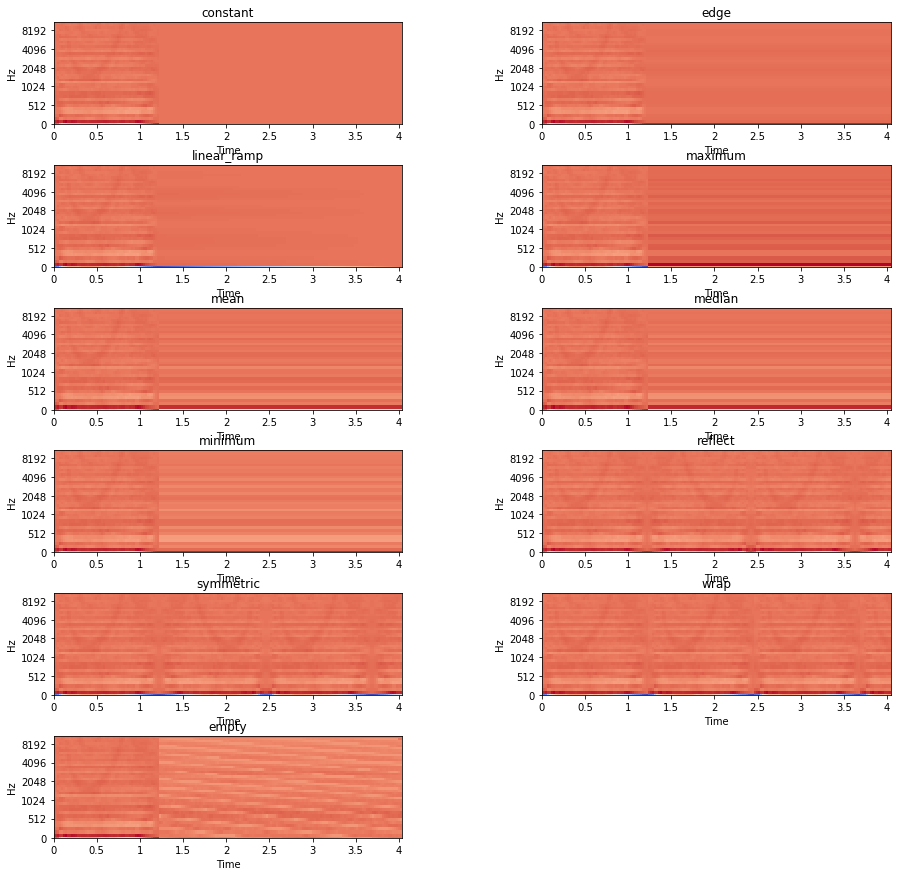

In [61]:
show_spectrum_per_sample(df_pad_modes, tag='_padded')

Judging by the spectograms the different padding modes can be grouped into 4 different traits:
 - `fill`: the mode `constant` simply fills the remaining space with a constant value form the sample, without any regards to the different MFCCs 
 - `continue`: the modes `edge`, `linear_ramp`, `maximum`, `mean`, `median`, `minimum`: carry over the unique MFCC values over the the padded area. 
 - `repeating pattern`: the modes `reflect`, `symmetric` and `wrap` seem to repeat the unique patterns in a sample
 - `undefined`: `empty` pads the remaining space with undefined values, thus the effect on training a model can't be estimated, potentially resulting in learning wrong features.